<a href="https://colab.research.google.com/github/frankbass3/Pandas-Tests-/blob/main/Pandas_DataReaders_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [20]:
data_meta = pd.DataFrame(df.nunique(),columns=['num'],index=None).sort_values('num').reset_index()
data_meta['type'] = 'numeric'
data_meta.loc[ data_meta['index'].isin(['country', 'country isocode']) ,'type'] = 'categorical'
data_meta

,index,num,type
0,year,1,numeric
1,country,8,categorical
2,country isocode,8,categorical
3,POP,8,numeric
4,XRAT,8,numeric
5,tcgdp,8,numeric
6,cc,8,numeric
7,cg,8,numeric


In [21]:
data_meta.loc[ data_meta['num'] < 0 , 'type' ] = 'categorical'
data_meta

,index,num,type
0,year,1,numeric
1,country,8,categorical
2,country isocode,8,categorical
3,POP,8,numeric
4,XRAT,8,numeric
5,tcgdp,8,numeric
6,cc,8,numeric
7,cg,8,numeric


In [27]:
#get all columns cate
list(data_meta[ data_meta['type'] == 'numeric']['index'])

['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']

In [29]:
list(data_meta[ data_meta['type'] == 'categorical']['index'])

['country', 'country isocode']

In [91]:
df['year'].value_counts()

2000    8
Name: year, dtype: int64

In [31]:
data_meta['type'] = data_meta['type'].map({'numeric':'num', 'categorical':'cat'}) 
data_meta

,index,num,type
0,year,1,num
1,country,8,cat
2,country isocode,8,cat
3,POP,8,num
4,XRAT,8,num
5,tcgdp,8,num
6,cc,8,num
7,cg,8,num


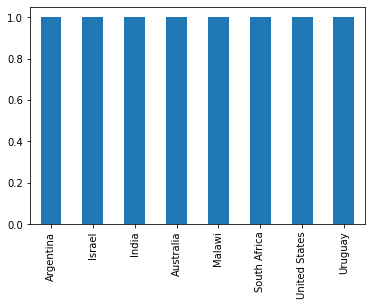

In [54]:
df['country'].value_counts().plot(kind='bar')
plt.show()

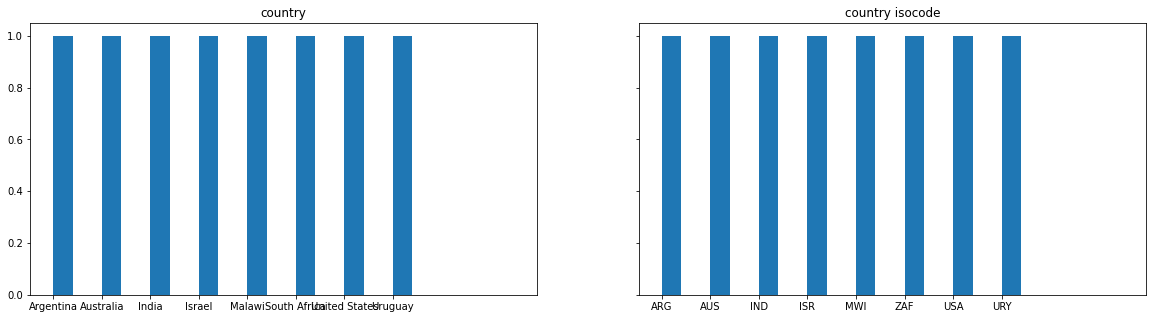

In [79]:
cat_features = list(data_meta[ data_meta['type'] == 'cat']['index'])

fig,axs = plt.subplots(1,2,figsize=(20,5),sharey=True)

for ax,feat in zip(axs.flatten(),cat_features):
  
    ax.hist(df[feat],align='mid',width=0.4, bins=np.arange(0,10,0.5))
    ax.set_title(feat)

#plt.bar(range(10), df['country'].values(), align='edge', width=0.3)
plt.show()

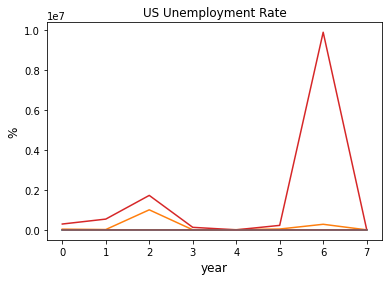

In [94]:
ax = df[ (df['year'] > 1900) & (df['year'] < 2012) ].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

In [96]:
df[ (df['year'] > 1900) & (df['year'] < 2012) ]


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


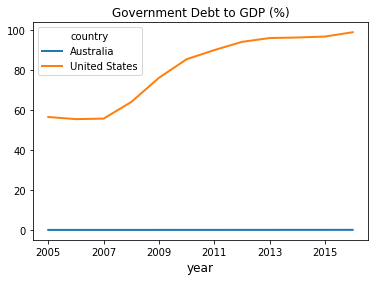

In [98]:
import datetime as dt
from pandas_datareader import data
from pandas_datareader import wb

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

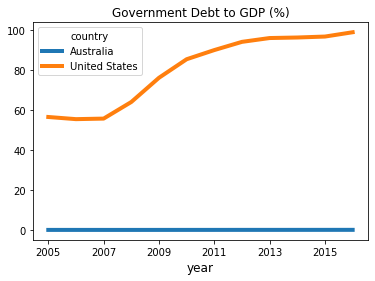

country,Australia,United States
year,,
2005,0.022507,56.549961
2006,0.021647,55.471137
2007,0.020320,55.745971
2008,0.018398,64.062230
2009,0.024061,76.177936
2010,0.029257,85.464274
2011,0.030587,90.054785
2012,0.039908,94.163413
2013,0.038039,96.075603


In [118]:
govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
govt_debt.index = govt_debt.index.get_level_values('year')
ax = govt_debt.plot(lw=4)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()
govt_debt

In [120]:
# percentage price change over 2019 
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [121]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        prices = data.DataReader(tick, 'yahoo', start, end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)
ticker

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
Date,,,,,,,,,,,,,
2019-01-02,47.080002,101.120003,115.209999,47.860001,116.279999,39.480000,1539.130005,323.809998,57.400002,46.930000,1045.849976,48.720001,60.910000
2019-01-03,44.490002,97.400002,112.910004,46.389999,114.650002,35.547501,1500.280029,310.899994,55.700001,46.639999,1016.059998,47.020000,61.150002
2019-01-04,47.220001,101.930000,117.320000,49.220001,119.730003,37.064999,1575.390015,327.079987,56.599998,47.570000,1070.709961,49.209999,62.810001
2019-01-07,47.439999,102.059998,118.150002,49.480000,121.279999,36.982498,1629.510010,328.109985,56.439999,46.950001,1068.390015,49.720001,62.549999
2019-01-08,47.740002,102.800003,119.830002,49.330002,122.309998,37.687500,1656.579956,340.529999,55.950001,47.480000,1076.280029,49.889999,63.889999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,59.410000,157.380005,134.979996,54.459999,141.339996,71.067497,1789.209961,333.000000,88.769997,54.709999,1343.560059,67.760002,49.099998
2019-12-26,59.820000,158.669998,134.910004,54.810001,141.529999,72.477501,1868.770020,329.920013,88.400002,55.020000,1360.400024,68.019997,49.660000
2019-12-27,60.080002,158.960007,135.270004,54.930000,141.279999,72.449997,1869.800049,330.140015,88.800003,55.349998,1351.890015,67.779999,50.060001


In [131]:
#bar graph like this one:

x1 = ticker.iloc[0]
x2 = ticker.iloc[-1]
p1 = ( (x2 - x1) /x1 ) * 100
p1

INTC    27.124036
MSFT    55.953316
IBM     16.344062
BHP     14.312575
TM      20.863429
AAPL    85.948580
AMZN    20.057432
BA       0.602209
QCOM    53.710803
KO      17.941611
GOOG    27.840517
SNE     39.573067
PTR    -17.369887
dtype: float64

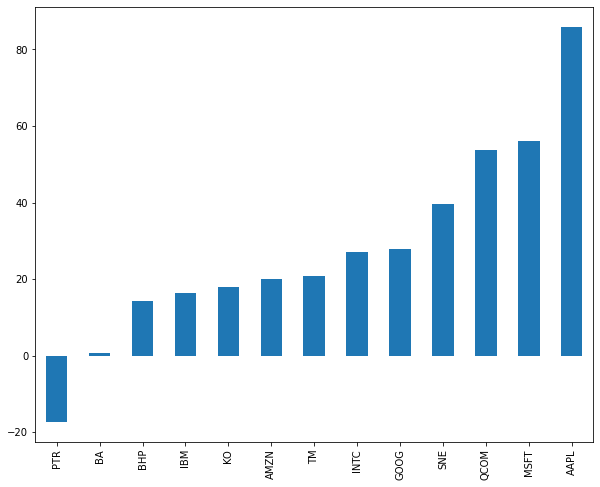

In [141]:
fig, ax = plt.subplots(figsize=(10,8))
p1.sort_values(inplace=True)
p1.plot(kind='bar', ax=ax)
plt.show()

In [149]:
for x in ticker.columns:
  ticker[x+'_change'] = ticker[x] - ticker[x].shift(2)

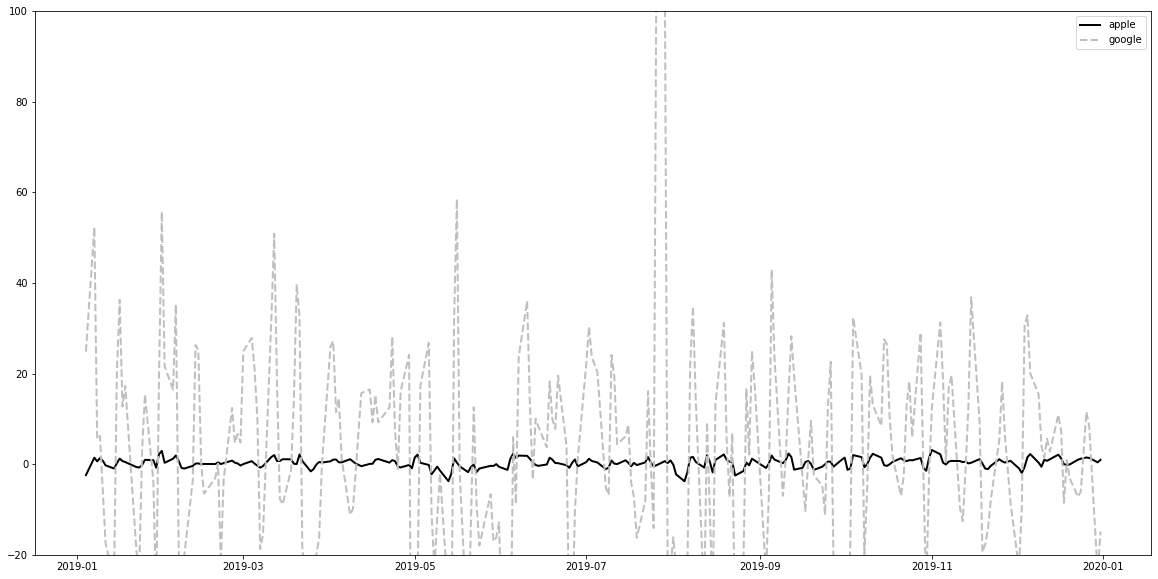

In [182]:
fig, ax = plt.subplots(figsize=(20,10))

plt.ylim([-20, 100])
#plt.yscale('log')
plt.plot(ticker.index, ticker['AAPL_change'], c = 'k', lw = 2., label = r'apple')
plt.plot(ticker.index, ticker['GOOG_change'], c = '.75', ls = '--', lw = 2., label = r'google')

plt.legend()

plt.show()


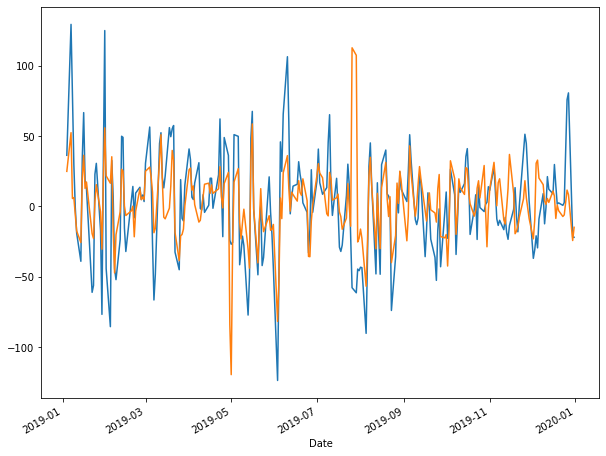

In [153]:
fig, ax = plt.subplots(figsize=(10,8))
ticker['AMZN_change'].plot(ax=ax)
ticker['GOOG_change'].plot(ax=ax)
plt.show()